In [1]:
import pandas as pd

In [2]:
# create df from db
logs_apr_df = pd.read_csv('user_logs_v2.csv')

In [3]:
logs_apr_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [4]:
logs_apr_df.shape

(18396362, 9)

In [5]:
logs_apr_df.date.min(), logs_apr_df.date.max()

(20170301, 20170331)

In [6]:
logs_apr_df.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [7]:
# keep most recent log date
logs_apr_df_sorted = logs_apr_df.sort_values(['msno', 'date'], 
                                              ascending=False).reset_index(drop = True)
logs_apr_df_sorted.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,zzzueVTwIa5TjXnG2c77bohCVkuksqLkd5mQTP0wTwQ=,20170303,2,0,0,0,1,3,232.490
1,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170328,2,0,0,0,8,10,2228.625
2,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170326,0,1,0,0,43,44,11138.597
3,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170325,1,0,0,0,31,23,8171.330
4,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170322,0,0,0,0,2,2,566.125
5,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170321,0,0,0,0,34,33,8764.685
6,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170309,0,0,0,0,13,13,3416.201
7,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170308,0,0,1,0,10,10,2680.979
8,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170306,1,0,0,0,11,11,2497.633
9,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170305,4,0,0,0,20,10,4844.580


In [8]:
logs_apr_last_df = logs_apr_df_sorted.drop_duplicates(subset='msno', keep='first').reset_index(drop=True)
logs_apr_last_df.columns = logs_apr_last_df.columns + '_last'
logs_apr_last_df = logs_apr_last_df.rename(columns={'msno_last': 'msno'})
logs_apr_last_df['date_last_dt'] = pd.to_datetime(logs_apr_last_df['date_last'], 
                                                        format='%Y%m%d',
                                                        errors='ignore')    

logs_apr_last_df['days_from_last_log'] = 28 - logs_apr_last_df['date_last_dt'].dt.day
logs_apr_last_df

,msno,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,date_last_dt,days_from_last_log
0,zzzueVTwIa5TjXnG2c77bohCVkuksqLkd5mQTP0wTwQ=,20170303,2,0,0,0,1,3,232.490,2017-03-03,25
1,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170328,2,0,0,0,8,10,2228.625,2017-03-28,0
2,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,20170331,3,1,0,0,4,5,1366.085,2017-03-31,-3
3,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,20170331,0,0,0,0,89,83,19857.000,2017-03-31,-3
4,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,20170331,15,4,2,5,72,20,16880.518,2017-03-31,-3
...,...,...,...,...,...,...,...,...,...,...,...
1103889,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,20170331,2,2,1,1,10,4,3266.534,2017-03-31,-3
1103890,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,20170330,9,2,2,1,18,18,4921.827,2017-03-30,-2
1103891,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,20170331,0,0,0,0,5,5,1287.132,2017-03-31,-3
1103892,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,20170331,16,12,5,12,39,51,14239.044,2017-03-31,-3


Aggregation sum

In [9]:
logs_apr_sum_df = logs_apr_df.copy()
logs_apr_sum_df.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

In [10]:
logs_apr_sum_df.drop('date', axis=1, inplace=True)

In [11]:
logs_apr_sum_df = logs_apr_sum_df.groupby('msno').sum().reset_index()
logs_apr_sum_df.columns = logs_apr_sum_df.columns + '_sum' 
logs_apr_sum_df = logs_apr_sum_df.rename(columns={'msno_sum': 'msno'})

In [12]:
logs_apr_sum_df.head()

,msno,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,total_secs_sum
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,86,11,10,5,472,530,117907.425
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,191,90,75,144,589,885,192527.892
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,43,12,15,12,485,468,115411.260
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,207,163,100,64,436,828,149896.558
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,105,24,39,35,479,230,116433.247


In [14]:
logs_apr_sum_df.msno.nunique()

1103894

Aggregation mean

In [15]:
logs_apr_mean_df = logs_apr_df.copy()
logs_apr_mean_df.drop('date', axis=1, inplace=True)
logs_apr_mean_df = logs_apr_mean_df.groupby('msno').mean().reset_index()
logs_apr_mean_df.columns = logs_apr_mean_df.columns + '_mean' 
logs_apr_mean_df = logs_apr_mean_df.rename(columns={'msno_mean': 'msno'})

In [16]:
logs_apr_mean_df.head()

,msno,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.307692,0.423077,0.384615,0.192308,18.153846,20.384615,4534.900962
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,6.161290,2.903226,2.419355,4.645161,19.000000,28.548387,6210.577161
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1.535714,0.428571,0.535714,0.428571,17.321429,16.714286,4121.830714
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,9.857143,7.761905,4.761905,3.047619,20.761905,39.428571,7137.931333
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,3.620690,0.827586,1.344828,1.206897,16.517241,7.931034,4014.939552


In [17]:
logs_apr_mean_df.msno.nunique()

1103894

In [18]:
train = pd.read_csv('sample_submission_v2.csv')

In [19]:
logs_apr = pd.merge(train, logs_apr_last_df, on='msno', how='left')
logs_apr = pd.merge(logs_apr, logs_apr_sum_df, on='msno', how='left')
logs_apr = pd.merge(logs_apr, logs_apr_mean_df, on='msno', how='left')
logs_apr.head()

,msno,is_churn,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,...,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,20170331.0,31.0,7.0,4.0,6.0,96.0,119.0,27285.109,...,1701.0,2273.0,500802.64,17.741935,5.677419,4.032258,4.225806,54.870968,73.322581,16154.923871
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,20170328.0,41.0,17.0,1.0,1.0,3.0,59.0,3349.629,...,84.0,149.0,23814.27,7.900000,1.900000,0.100000,0.200000,8.400000,14.900000,2381.427000
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
logs_apr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   msno                907471 non-null  object        
 1   is_churn            907471 non-null  int64         
 2   date_last           700229 non-null  float64       
 3   num_25_last         700229 non-null  float64       
 4   num_50_last         700229 non-null  float64       
 5   num_75_last         700229 non-null  float64       
 6   num_985_last        700229 non-null  float64       
 7   num_100_last        700229 non-null  float64       
 8   num_unq_last        700229 non-null  float64       
 9   total_secs_last     700229 non-null  float64       
 10  date_last_dt        700229 non-null  datetime64[ns]
 11  days_from_last_log  700229 non-null  float64       
 12  num_25_sum          700229 non-null  float64       
 13  num_50_sum          700229 no

<AxesSubplot:>

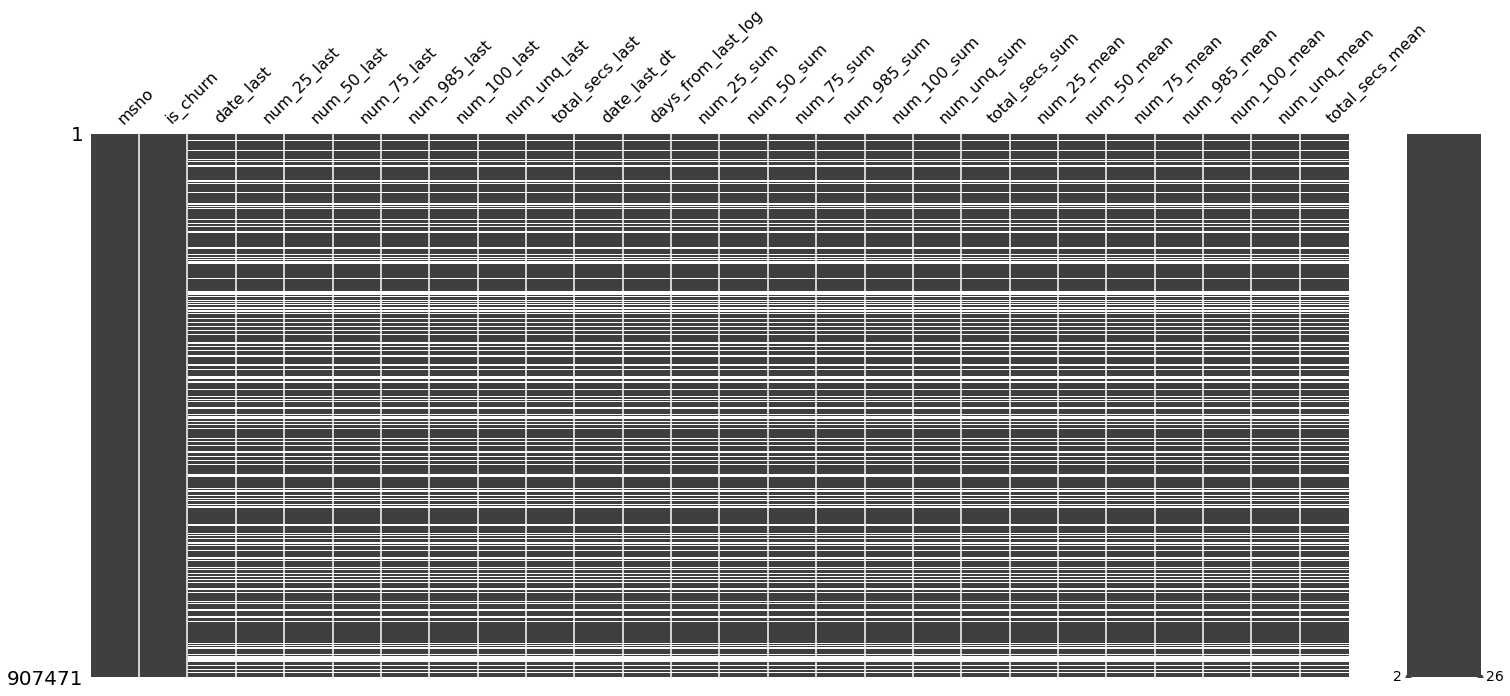

In [21]:
import missingno as ms
import matplotlib.pyplot as plt 

ms.matrix(logs_apr)

In [22]:
import pickle

with open('Data/Processed/logs_apr.pickle', 'wb') as handle:
    pickle.dump(logs_apr, handle)